<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Firstmidterm2023.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Classical Mechanics 1 -->

# PHY321: Classical Mechanics 1
**First midterm project, Bergen Kendziorski**

### Practicalities about  homeworks and projects

1. You can work in groups (optimal groups are often 2-3 people) or by yourself. If you work as a group you can hand in one answer only if you wish. **Remember to write your name(s)**!

2. How do I(we)  hand in?  You can hand in the paper and pencil exercises as a hand-written document. Alternatively, you can hand in everyhting (if you are ok with typing mathematical formulae using say Latex) as a jupyter notebook at D2L. The numerical part should always be handed in as a jupyter notebook by the deadline at D2L.

### Introduction to the first midterm project, total score 100 points

The relevant reading background is
1. chapters 2-5 of Taylor.

2. chapters 6-14 of Malthe-Sørenssen.

In this midterm project we will start with a potential similar to the
one we discussed in exercise 1 in homework 5. There are some elements
of that exercise which are repeated here, similarly, a good fraction
of the codes you have developed for homeworks 3-5 can be used here.
We start with a one-dimensional potential and motion.  Thereafter we
extend this potential model to a two-dimensional model and study the
numerical solution of the corresponding problem.

### Part 1, Particle in a one-dimensional  potential

We consider a particle (for example an atom) of mass $m$ moving in a one-dimensional potential,

$$
V(x)=\frac{V_0}{d^4}\left(x^4-2x^2d^2+d^4\right).
$$

We will assume all other forces on the particle are small in comparison, and neglect them in our model.  The parameters $V_0$ and $d$ are known constants. 

1. (5pt) Plot the potential and find the  equilibrium points (stable and unstable) by requiring that the first derivative of the potential is zero. Make an energy diagram (see for example Malthe-Sørenssen chapter 11.3) and mark the equilibrium points on the diagram and characterize their stability. The position of the particle is $x$. 

2. (5pt) Choose two different energies that give two distinct types of motions, draw them into the energy diagram, and describe the motion in each case.

3. (5pt) If the particle  starts at rest at $x=2d$, what is the velocity of the particle at the point $x=d$?

4. (5pt) If the particle  starts at $x=d$ with velocity $v_0$, how large must $v_0$ be for the  particle to reach the point $x=−d$?

5. (5pt) Use the above potential to set up the total forces acting on the particle.  Find the acceleration acting on the particle. Is this a conservative force? Calculate also the **curl** of the force  $\boldsymbol{\nabla}\times \boldsymbol{F}$ in order to validate your conclusion. 

6. (5pt) Are linear momentum and angular momentum conserved? You need to show this by calculating the quantities.

7. (10pt) Write a numerical algorithm to find the position and velocity of the particle at a time $t+\Delta t$ given the position and velocity at a time $t$. Here you can use either the standard forward Euler, or the Euler-Cromer or the Velocity Verlet algorithms.   You need to justify your choice here (hint: consider energy conservation).

8. (10pt) Use now your program to find the position of the particle as function of time from $t=0$ to $t=30$ s using a mass  $m=1.0$ kg, the parameter $V_0=1$ J and $d=0.1$ m. Make a plot of three distinct positions with initial conditions $x_0=d$ and $v_0=0.5$ m/s, $x_0=d$ and $v_0=1.5$ m/s, and $x_0=d$ and $v_0=2.5$ m/s. Plot also the velocity.  Perform calculations with and without the term $x^4$ in the potential. Do you see a difference? Discuss your results.

9. (10pt) Describe the behavior of the particle for the three initial conditions  and sketch the motion in an energy diagram. Is energy conserved in your simulations?

Questions 1-6 handwriten on paper

Question 7: Here I will use the Euler-Cromer method. As we saw in question 5, energy is conserved, which limits us to either Euler-Cromer or Velocity Verlet, and I just decided to choose Euler-Cromer.

In [1]:
#this stuff taken from week 8 lecture

%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [2]:
#question 7 important code - this part is just a function that does the algorithm. I'll use it in question 8

def my_num_func(V0,d,m, tfinal, x0, v0, full): #I'll be assuming I'm always starting at time t0 = 0
    DeltaT = 0.001
    #set up arrays 
    n = ceil(tfinal/DeltaT)
    # set up arrays for t, v, and x
    t = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    # Initial conditions as simple one-dimensional arrays of time
    x[0] = x0
    v[0] = v0

    # Start integrating using Euler-Cromer's method
    for i in range(n-1):
        # defining acceleration
        if(full):
            a = (4*x[i]*V0/(d**2) - 4*(x[i]**3)*V0/(d**4))/m
        else:
            a = (4*x[i]*V0/(d**2))/m
        # update velocity, time and position
        v[i+1] = v[i] + DeltaT*a
        x[i+1] = x[i] + DeltaT*v[i+1]
        t[i+1] = t[i] + DeltaT
    # Plot position and velocity as function of time    
    fig, ax = plt.subplots(4)
    fig.suptitle("with x^4 term included, initial velocity: " + str(v0) + "  m/s")
    ax[0].set_ylabel('x[m]')
    ax[0].set_xlabel('t[s]')
    ax[0].plot(t, x)
    ax[1].set_ylabel('x[m]')
    ax[1].set_xlabel('t[s]')
    ax[1].plot(t, x)
    ax[1].set_xlim(0, 2)
    ax[2].set_ylabel('v[m/s]')
    ax[2].set_xlabel('t[s]')
    ax[2].plot(t, v)
    ax[3].set_ylabel('v[m/s]')
    ax[3].set_xlabel('t[s]')
    ax[3].plot(t, v)
    ax[3].set_xlim(0, 2)
    if (not full):
        ax[1].set_ylim(0,10000)
        ax[3].set_ylim(0,10000)
    fig.tight_layout()
    plt.show()

Question 8: We'll start producing all of the plots WITH the x^4 term included in the potential. I'll also show a zoomed in version of the figure because I can't really see the details of what the pattern is otherwise.

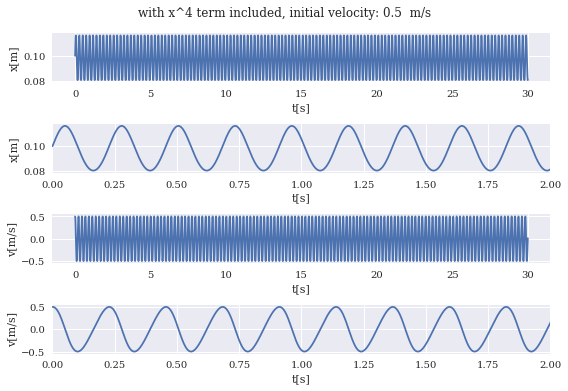

In [3]:
my_num_func(V0 = 1, d = 0.1, m = 1, tfinal = 30, x0 = 0.1, v0 = 0.5, full = True)

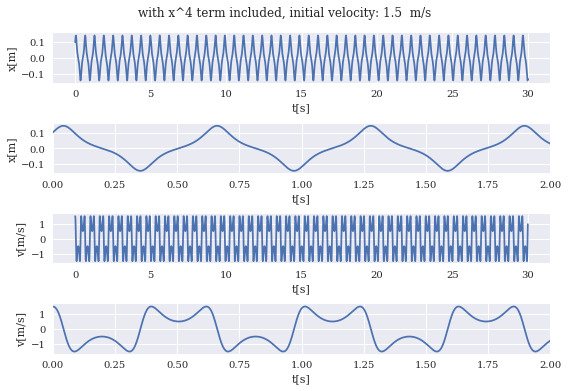

In [4]:
my_num_func(V0 = 1, d = 0.1, m = 1, tfinal = 30, x0 = 0.1, v0 = 1.5, full = True)

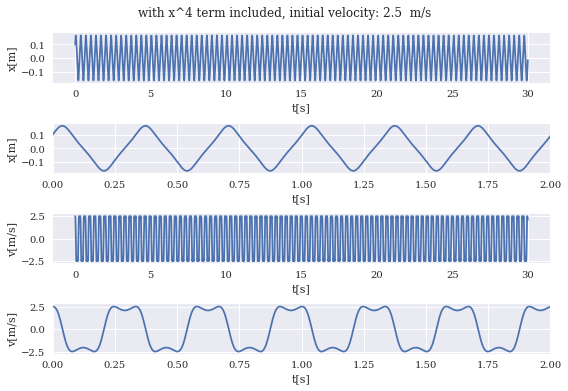

In [5]:
my_num_func(V0 = 1, d = 0.1, m = 1, tfinal = 30, x0 = 0.1, v0 = 2.5, full = True)

Now we'll try plotting these same initial conditions WITHOUT the x^4 term included in the potential.

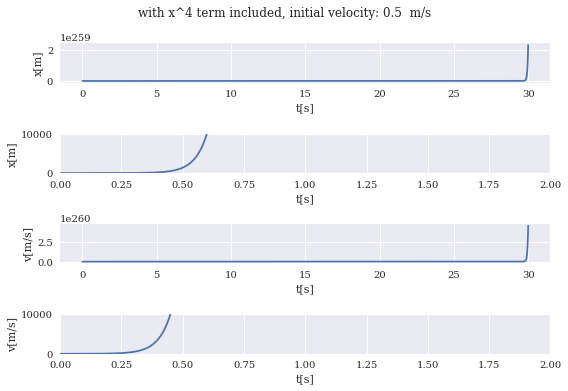

In [6]:
my_num_func(V0 = 1, d = 0.1, m = 1, tfinal = 30, x0 = 0.1, v0 = 0.5, full = False)

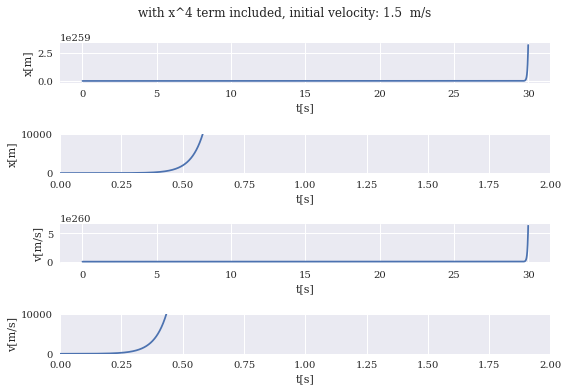

In [7]:
my_num_func(V0 = 1, d = 0.1, m = 1, tfinal = 30, x0 = 0.1, v0 = 1.5, full = False)

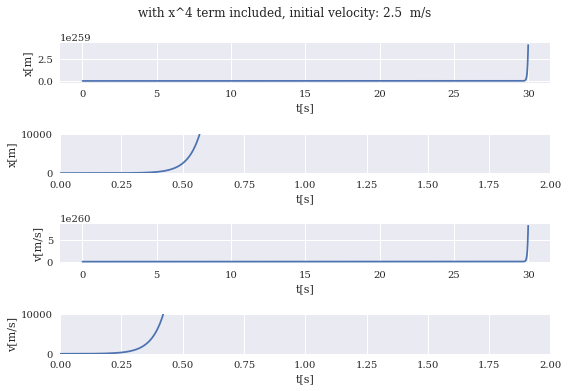

In [8]:
my_num_func(V0 = 1, d = 0.1, m = 1, tfinal = 30, x0 = 0.1, v0 = 2.5, full = False)

We can see a very clear difference with and without the x^4 term in the potential. Without this term, the position and the velocity both blow up to (essentially) infinity very quickly, with the velocity starting its rapid ascent very quickly. This shows that the x^4 term is absolutely necessary to get the interesting motion that we will analyze in part 9, as without it we get the same blowup of position and velocity no matter what we set our initial conditions to (not very fun).

Question 9: For plotting our V(x), we have minima at x = -0.1 and +0.1, so I'll go from -0.17 to +0.17 (Just going based off of what looks best to me, no real reason). We're starting at x = d, so there's only kinetic energy at the beginning, and we can base the total energy for that scenario based off of just the potential at that point. The figure for V(x) is shown below with the 3 horizontal lines representing the total energy of the different scenarios.

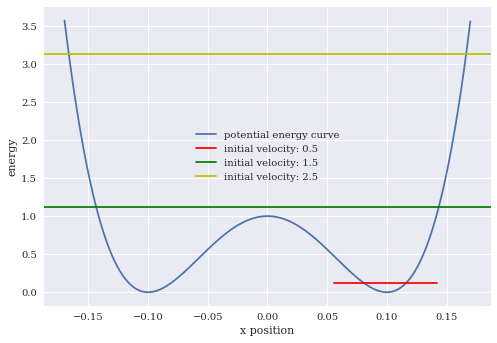

In [25]:
d=0.1
V0 = 1
m = 1
x = np.arange(-0.17,0.17,.0001)
V = (V0/(d**4))*(x**4-2*x*x*d*d+d**4)
plt.plot(x,V, label = "potential energy curve")

E1 = .5*m*.5*.5
E2 = .5*m*1.5*1.5
E3 = .5*m*2.5*2.5
plt.axhline(y=E1, xmin = .65, xmax = .88, color = 'r', linestyle='-',label="initial velocity: 0.5")
plt.axhline(y=E2, color = 'g', linestyle='-',label="initial velocity: 1.5")
plt.axhline(y=E3, color = 'y', linestyle='-',label="initial velocity: 2.5")

plt.xlabel("x position")
plt.ylabel("energy")
plt.legend()

All 3 of the particles will oscillate back and forth between where they intersect with the plot of the potential energy curve. We can see that the particle with initial velocity 0.5 m/s doesn't have the energy to get over the potential hump in the middle, and as such is stuck oscillating around x = 0.1 m. Both the particles with higher initial velocities have the energy to get over the potential hump in the middle, and as such oscillate symmetrically around x=0, with the higher energy particle (v0 = 2.5 m/s) having more energy and as such going to more extreme x-values where the potential rises rapidly.

Looking at the graphs plotted in question 8, we can see that energy IS CONSERVED in this simulation, since we get a repition with constant heights (meaning particle is reaching the same x-value at each repetition, and thus has the same energy each time, so no energy loss).

### Part 2, a potential with confinement

In the final part we are going to study a new potential. This potential contains the basic mathematical components needed to describe the confinement of quarks through a term $\kappa x$. The aim of this exercise is to try to develop your intuition about the motion of physical objects due to specific forces. Then we will test our intution by running simulations. The potential, in one dimension only is defined for $x\in [0.2,\infty)$.  It reads

$$
V(x) = -\frac{\gamma}{x}+\frac{\delta}{x^2}+\kappa x,
$$

where the last term is the one which ensures confinement of for example quarks.

1. (5pt) Plot the potential for $x\in [0.2,10]$ and set $\gamma=10$, $\delta = 3$ and $\kappa =1$. Find the value of $x$ where the potential has a minimum.

2. (5pt) Show that this potential leads to an energy conserving force by calculating the **curl** of the resulting force.

3. (10pt) Assume now that at $x=2$ the particle moving in this potential is at rest, that is its velocity is zero. Find the total energy and describe what kind of motion you can expect. The point $x=2$ is a so-called turning point. Can you find the other turning point where the kinetic energy is zero. If you keep increasing $x$, will the particle ever be able to escape the potential well?

4. (20pt) Finally we will now change our program (using either the Euler-Cromer or the Velocity-Verlet method) and compute the position and the velocity as functions of time using the force computed from the above potential. Use as initial condition at time $t=0$ that the particle is $x_0=2$ and has initial velocity $v_0=0$. Test numerically that energy is conserved as function of time. And test that the particle moves according to your analysis from the previous exercise.

Question 1: See handwritten section. The following is just the code for the graph.

Text(0.5, 0, 'distance (x)')

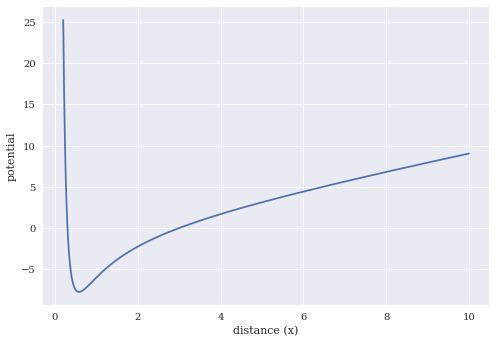

In [32]:
gamma = 10
delta = 3
kappa = 1

x = np.arange(.2,10,.001)
V = -gamma/x + delta/(x*x) + kappa*x

plt.plot(x,V)
plt.ylabel("potential")
plt.xlabel("distance (x)")

By calculations shown on my handwritten paper, the minimum potential falls at x = 0.5804

Questions 2 and 3 shown on handwritten paper.


Question 4:

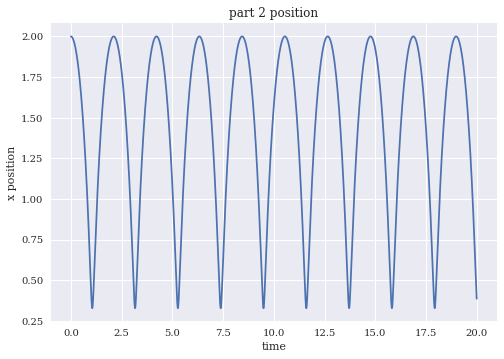

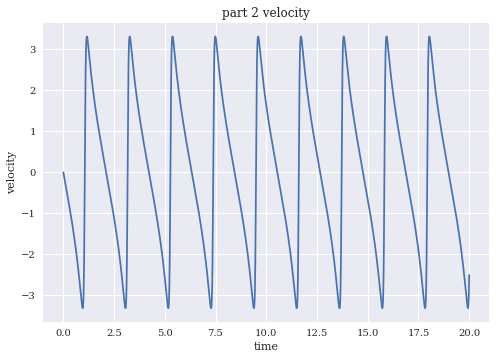

In [46]:
#In this part I'll assume that the particle is again m = 1
#I'm using the same gamma, delta, and kappa values (10, 3, and 1)
DeltaT = 0.0001
tfinal = 20
#set up arrays 
n = ceil(tfinal/DeltaT)
# set up arrays for t, v, and x
t = np.zeros(n)
v = np.zeros(n)
x = np.zeros(n)
# Initial conditions as simple one-dimensional arrays of time
x[0] = 2
v[0] = 0

# Start integrating using Euler-Cromer's method
for i in range(n-1):
    # defining acceleration
    a = -10/(x[i]**2) + 6/(x[i]**3) - 1
    # update velocity, time and position
    v[i+1] = v[i] + DeltaT*a
    x[i+1] = x[i] + DeltaT*v[i+1]
    t[i+1] = t[i] + DeltaT
# Plot position as function of time
plt.title("part 2 position")
plt.xlabel("time")
plt.ylabel("x position")
plt.plot(t,x)
plt.show()

plt.title("part 2 velocity")
plt.xlabel("time")
plt.ylabel("velocity")
plt.plot(t,v)
plt.show()

From the above graphs not reducing in magnitude over time, we can already see that energy appears to be conserved, but we can verify this by plotting the energy over time. This is done below:

Text(0.5, 0, 'time')

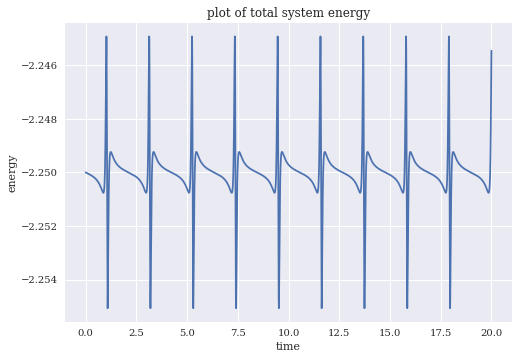

In [47]:
KinEn = .5*m*v*v
PotEn = -10/x + 3/(x*x) + x
plt.title("plot of total system energy")
plt.plot(t,PotEn+KinEn)
plt.ylabel("energy")
plt.xlabel("time")

This looks not the greatest, but the scale on the y-axis is slightly deceiving. If we put it into perspective with how the potential and the kinetic energies are varying over time we can see that this is actually a very negligible repetitive pattern in the total energy of the system.

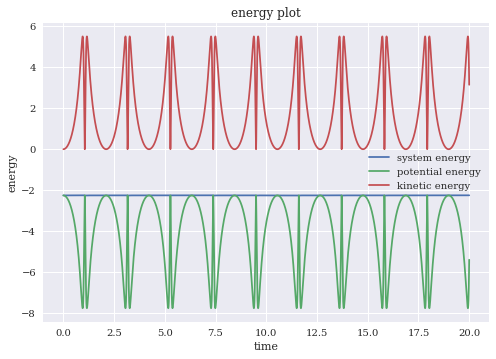

In [48]:
plt.title("energy plot")
plt.plot(t,PotEn+KinEn, label = "system energy")
plt.plot(t,PotEn, label = "potential energy")
plt.plot(t,KinEn, label = "kinetic energy")
plt.ylabel("energy")
plt.xlabel("time")
plt.legend()

From this plot we can see that the energy of the system is conserved. That rhythmic pattern we observed is just due to inherent inaccuracies from having a time step in numerical solutions. By changing the time step, I was able to reduce the energy variance down to as small of a value as I chose, it just takes computational time to decrease the time step farther.

We can also verify that the particle moves in the matter I predicted it would both visually and numerically. Looking at the plot of position over time, we see a much sharper turnaround of the particle, which is what I had predicted happening due to the sharper increase in the potential on the left side of the minimum. Looking at the maximum and minimum x-values, we can also see that the particle turnaround points were what we predicted.

In [49]:
print("left turnaround point: ", min(x))
print("right turnaround point: ", max(x))

left turnaround point:  0.3276770774995803
right turnaround point:  2.0000000034233536


These are EXTREMELY accurate to what I had previously predicted, which confirms that things are working as expected. In the left turnaround point this actually goes to many more decimal points than I had even bothered to write down, but is identical for a long ways.

### Classical Mechanics Extra Credit Assignment: Scientific Writing and attending Talks

The following gives you an opportunity to earn **five extra credit
points** on each of the remaining homeworks and **ten extra credit points**
on the midterms and finals.  This assignment also covers an aspect of
the scientific process that is not taught in most undergraduate
programs: scientific writing.  Writing scientific reports is how
scientist communicate their results to the rest of the field.  Knowing
how to assemble a well written scientific report will greatly benefit
you in you upper level classes, in graduate school, and in the work
place.

The full information on extra credits is found at <https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/>. There you will also find examples on how to write a scientific article. 
Below you can also find a description on how to gain extra credits by attending scientific talks.

This assignment allows you to gain extra credit points by practicing
your scientific writing.  For each of the remaining homeworks you can
submit the specified section of a scientific report (written about the
numerical aspect of the homework) for five extra credit points on the
assignment.  For the two midterms and the final, submitting a full
scientific report covering the numerical analysis problem will be
worth ten extra points.  For credit the grader must be able to tell
that you put effort into the assignment (i.e. well written, well
formatted, etc.).  If you are unfamiliar with writing scientific
reports, [see the information here](https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/IntroductionScientificWriting.md)

The following table explains what aspect of a scientific report is due
with which homework.  You can submit the assignment in any format you
like, in the same document as your homework, or in a different one.
Remember to cite any external references you use and include a
reference list.  There are no length requirements, but make sure what
you turn in is complete and through.  If you have any questions,
please contact Julie Butler at butler@frib.msu.edu.

<table class="dotable" border="1">
<thead>
<tr><th align="center">  HW/Project </th> <th align="center">Due Date</th> <th align="center">Extra Credit Assignment</th> </tr>
</thead>
<tbody>
<tr><td align="center">   HW 3             </td> <td align="center">   2-8         </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   HW 4             </td> <td align="center">   2-15        </td> <td align="center">   Introduction               </td> </tr>
<tr><td align="center">   HW 5             </td> <td align="center">   2-22        </td> <td align="center">   Methods                    </td> </tr>
<tr><td align="center">   HW 6             </td> <td align="center">   3-1         </td> <td align="center">   Results and Discussion     </td> </tr>
<tr><td align="center">   **Midterm 1**    </td> <td align="center">   **3-12**    </td> <td align="center">   *Full Written Report*      </td> </tr>
<tr><td align="center">   HW 7             </td> <td align="center">   3-22        </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   HW 8             </td> <td align="center">   3-29        </td> <td align="center">   Introduction               </td> </tr>
<tr><td align="center">   HW 9             </td> <td align="center">   4-5         </td> <td align="center">   Results and Discussion     </td> </tr>
<tr><td align="center">   **Midterm 2**    </td> <td align="center">   **4-16**    </td> <td align="center">   *Full Written Report*      </td> </tr>
<tr><td align="center">   HW 10            </td> <td align="center">   4-26        </td> <td align="center">   Abstract                   </td> </tr>
<tr><td align="center">   **Final**        </td> <td align="center">   **4-30**    </td> <td align="center">   *Full Written Report*      </td> </tr>
</tbody>
</table>

You can also gain extra credits if you attend scientific talks.
This is described here.

### Integrating Classwork With Research

This opportunity will allow you to earn up to 5 extra credit points on a Homework per week. These points can push you above 100% or help make up for missed exercises.
In order to earn all points you must:

1. Attend an MSU research talk (recommended research oriented Clubs is  provided below)

2. Summarize the talk using at least 150 words

3. Turn in the summary along with your Homework.

Approved talks:
Talks given by researchers through the following clubs:
* Research and Idea Sharing Enterprise (RAISE)​: Meets Wednesday Nights Society for Physics Students (SPS)​: Meets Monday Nights

* Astronomy Club​: Meets Monday Nights

* Facility For Rare Isotope Beam (FRIB) Seminars: ​Occur multiple times a week

If you have any questions please consult one of us. 

All the material on extra credits is at <https://github.com/mhjensen/Physics321/blob/master/doc/Homeworks/ExtraCredits/>.